In [1]:
import os
from pathlib import Path
import tensorflow
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
p = Path("./newDataset/")

In [3]:
dirs = p.glob("*") #  "*" will give everything present  in this path
#for d in dirs:     # dir is a generator object 
#    print(d)

In [4]:
image_data =[]  #arrray to store all image data
labels = []    # store all image labels.

#optional to store inage path
image_path =[] 

#in machine learning labels are stored as integers rather than strings
label_dict = {'Pikachu':0,'Bulbasaur':1,'Meowth':2}
label2pokemon = {0:'Pikachu',1:'Bulbasaur',2:'Meowth'}
for folder_dir in dirs:  #iterate over folder directories
    label = os.path.basename(folder_dir)  #we are converting classname to string
    #so that we can use it later. WE are splitting it near slash and extracting the last string 
    
    cnt =0
   # print(label)
    
    #iterate over all folder directories and pick all the images
    
    print(folder_dir)
    for img_path in folder_dir.glob("*.jpg"): #glob method helps in iterate over directories
        img =image.load_img(img_path,target_size = (40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt+=1
        
    print(cnt)    

newDataset/Pikachu
199
newDataset/Bulbasaur
174
newDataset/Meowth
70


# Visulization

In [5]:
import numpy as np
print(len(image_data))
print(len(labels))

443
443


In [6]:
import random
random.seed(10)

In [7]:
X = np.array(image_data)
Y = np.array(labels)

print(X.shape,Y.shape)

(443, 40, 40, 3) (443,)


In [8]:
# draw some pokemons

In [9]:
#drawImg(X[0]/255,Y[0])

In [10]:
#shuffle our data 
# COmbined = List(zip(X,y))

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state =2)

X = X/255.0   # Normalization

In [11]:
print(Y)

[1 2 0 0 2 0 1 0 1 0 1 1 1 1 0 1 2 0 1 2 2 1 2 0 1 0 0 2 0 0 1 0 0 1 1 2 0
 2 0 0 1 1 1 0 0 0 1 1 1 2 1 0 0 1 2 1 1 0 0 0 2 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 2 2 1 2 1 1 1 0 2 1 0 0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 0 0 2 2 0 2 1
 1 1 0 2 2 0 0 0 0 1 1 1 0 1 1 1 1 1 2 1 1 0 0 1 1 0 0 1 1 2 1 1 2 0 1 1 0
 0 2 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 2 1 0 1 1 0 0 2 2 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 0 1 2 1 0 1 0 0 2 2 1 0 1 1 0 0 1 0 0 0 1 1 2 2 0 0 1 0
 1 0 0 0 1 2 0 0 0 0 0 1 0 1 0 1 1 1 0 1 2 0 2 2 0 1 0 0 0 1 0 2 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 2 0 1 1 1 0 1 1 1 1 0 0 1 1 2 0 0 0 0 1 1 2 0 1 0 2 1
 0 0 1 2 2 0 1 0 2 1 2 2 1 0 0 1 2 2 2 1 2 1 0 1 2 0 2 0 1 0 1 0 0 0 2 1 0
 0 0 1 2 2 2 0 0 1 0 1 2 1 2 0 0 1 0 1 2 1 1 2 1 0 0 0 0 2 1 0 0 0 1 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 2 1 1 1 1 0 1 0 1 2 2 0 0 1 0 0 0 0 1 1 1 0
 0 1 1 1 2 0 0 0 1 0 1 1 0 0 0 1 0 0 2 1 1 1 0 1 2 0 2 0 1 1 0 1 0 0 0 0]


In [12]:
def drawImg(img,ls):
    plt.title(label2pokemon[ls])
    plt.imshow(img)
    plt.show()

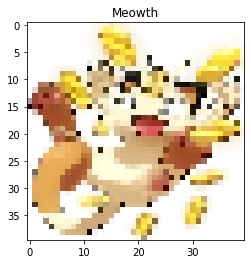

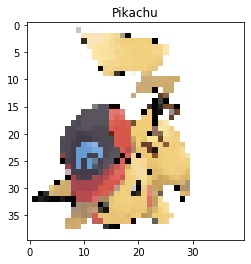

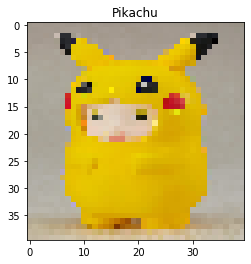

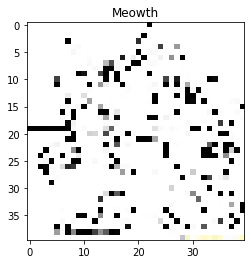

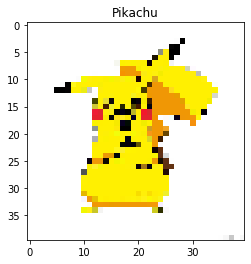

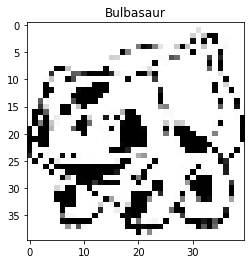

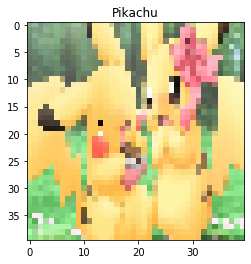

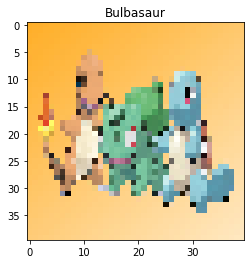

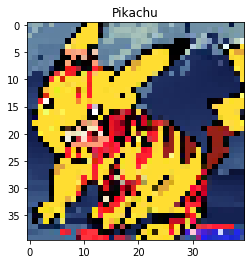

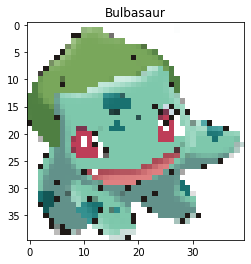

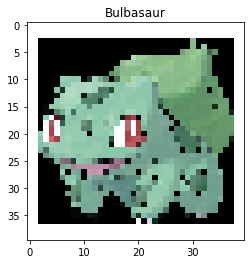

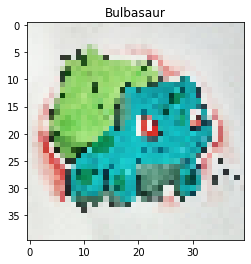

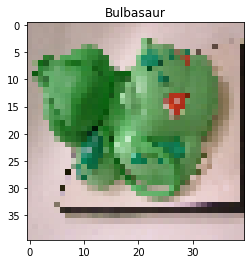

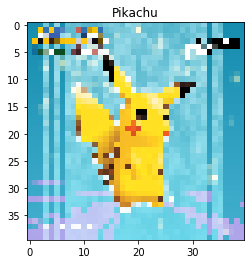

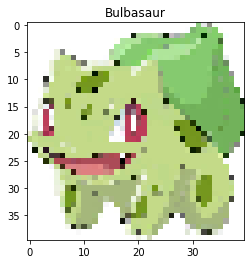

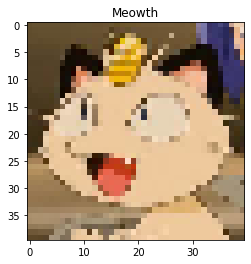

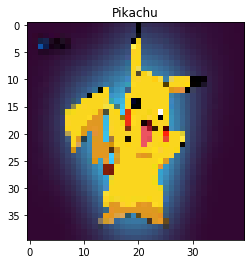

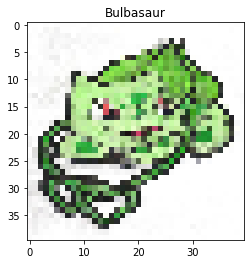

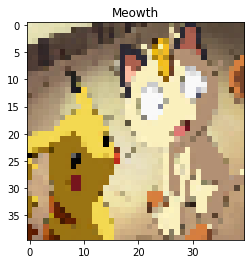

In [13]:
for i in range(1,20):
    drawImg(X[i].reshape(40,40,3),Y[i])# 4800 input units

In [14]:
# creating training and resting data

In [15]:
split = int(X.shape[0]*.8)
X_=np.array(X)
Y_=np.array(Y)

# Training set

X = X_[:split,:]
Y =Y_[:split]

#Test Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(354, 40, 40, 3) (354,)
(89, 40, 40, 3) (89,)


In [16]:
def softmax(a):
    e_pa =np.exp(a) #vector
    ans = e_pa/np.sum(e_pa,axis = 1,keepdims = True)
    return ans

In [17]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model ={} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])  # We are passing the dimentions of array it will randomly create . In this case it is 2*4
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second layer
        model['W2'] = np.random.randn(layers[0],layers[1])  # We are passing the dimentions of array it will randomly create . In this case it is 2*4
        model['b2'] = np.zeros((1,layers[1]))
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)  # We are passing the dimentions of array it will randomly create . In this case it is 2*4
        model['b3'] = np.zeros((1,output_size))
        
        
        self.model = model
        
        
    def forward(self,x):
            W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
            b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

            z1 =np.dot(x,W1) + b1
            a1 =  np.tanh(z1)

            z2 = np.dot(a1,W2) + b2
            a2 = np.tanh(z2)

            z3 = np.dot(a2,W3)+b3
            y_=  softmax(z3) 

            self.activation_outputs = (a1,a2,y_)
            return y_
    
        
    def backward(self,x,y,learning_rate = 0.001):
            W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
            b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

            a1,a2,y_ = self.activation_outputs
            m = x.shape[0]
            delta3 = y_ - y
            
            dw3 = np.dot(a2.T,delta3)
            db3 = np.sum(delta3,axis=0)/float(m)

            delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
            dw2 = np.dot(a1.T,delta2)
            db2 = np.sum(delta2,axis =0)/float(m)

            delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
            dw1 = np.dot(X.T,delta1)
            db1 = np.sum(delta1,axis =0)/float(m)


        #update the weights using the gradient descent

            self.model["W1"] -= learning_rate*dw1
            self.model["b1"]-= learning_rate*db1


            self.model["W2"] -= learning_rate*dw2
            self.model["b2"]-= learning_rate*db2

            self.model["W3"] -= learning_rate*dw3
            self.model["b3"]-= learning_rate*db3
    
    def predict(self,x):
            y_out = self.forward(x)
            return np.argmax(y_out,axis =1)
    
    def summary(self):
            W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
            a1,a2,y_ = self.activation_outputs
    






In [18]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [19]:
def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [20]:
def train(X,Y,model,epochs,learning_rate,logs =True):
    training_loss = []
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
         print("Epoch %d Loss %.4f"%(ix,l))
        
    return training_loss    
            

In [21]:
model = NeuralNetwork(input_size = 4800,layers = [100,50],output_size = 3)

In [22]:
X=X.reshape(X.shape[0],-1)# reshapping X in a linear layer -1 is to autoatically find the dimentions
XTest=XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(89, 4800)


In [23]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 3.2009
Epoch 1 Loss 2.5357
Epoch 2 Loss 1.7228
Epoch 3 Loss 1.4971
Epoch 4 Loss 1.2731
Epoch 5 Loss 1.1491
Epoch 6 Loss 1.0744
Epoch 7 Loss 0.9983
Epoch 8 Loss 0.9635
Epoch 9 Loss 0.8638
Epoch 10 Loss 0.8304
Epoch 11 Loss 0.7526
Epoch 12 Loss 0.7106
Epoch 13 Loss 0.6943
Epoch 14 Loss 0.6736
Epoch 15 Loss 0.6784
Epoch 16 Loss 0.6349
Epoch 17 Loss 0.6029
Epoch 18 Loss 0.5867
Epoch 19 Loss 0.5835
Epoch 20 Loss 0.5592
Epoch 21 Loss 0.5743
Epoch 22 Loss 0.5548
Epoch 23 Loss 0.5220
Epoch 24 Loss 0.5024
Epoch 25 Loss 0.4712
Epoch 26 Loss 0.4434
Epoch 27 Loss 0.4491
Epoch 28 Loss 0.4364
Epoch 29 Loss 0.4278
Epoch 30 Loss 0.4245
Epoch 31 Loss 0.3980
Epoch 32 Loss 0.3815
Epoch 33 Loss 0.3800
Epoch 34 Loss 0.3439
Epoch 35 Loss 0.3441
Epoch 36 Loss 0.3348
Epoch 37 Loss 0.3386
Epoch 38 Loss 0.3218
Epoch 39 Loss 0.3136
Epoch 40 Loss 0.3054
Epoch 41 Loss 0.3161
Epoch 42 Loss 0.2965
Epoch 43 Loss 0.2905
Epoch 44 Loss 0.2957
Epoch 45 Loss 0.2999
Epoch 46 Loss 0.2935
Epoch 47 Loss 0.2831
Ep

Epoch 380 Loss 0.0354
Epoch 381 Loss 0.0353
Epoch 382 Loss 0.0352
Epoch 383 Loss 0.0351
Epoch 384 Loss 0.0350
Epoch 385 Loss 0.0349
Epoch 386 Loss 0.0348
Epoch 387 Loss 0.0347
Epoch 388 Loss 0.0346
Epoch 389 Loss 0.0345
Epoch 390 Loss 0.0344
Epoch 391 Loss 0.0344
Epoch 392 Loss 0.0343
Epoch 393 Loss 0.0342
Epoch 394 Loss 0.0341
Epoch 395 Loss 0.0340
Epoch 396 Loss 0.0339
Epoch 397 Loss 0.0338
Epoch 398 Loss 0.0337
Epoch 399 Loss 0.0337
Epoch 400 Loss 0.0336
Epoch 401 Loss 0.0335
Epoch 402 Loss 0.0334
Epoch 403 Loss 0.0333
Epoch 404 Loss 0.0332
Epoch 405 Loss 0.0332
Epoch 406 Loss 0.0331
Epoch 407 Loss 0.0330
Epoch 408 Loss 0.0329
Epoch 409 Loss 0.0328
Epoch 410 Loss 0.0328
Epoch 411 Loss 0.0327
Epoch 412 Loss 0.0326
Epoch 413 Loss 0.0325
Epoch 414 Loss 0.0324
Epoch 415 Loss 0.0324
Epoch 416 Loss 0.0323
Epoch 417 Loss 0.0322
Epoch 418 Loss 0.0321
Epoch 419 Loss 0.0321
Epoch 420 Loss 0.0320
Epoch 421 Loss 0.0319
Epoch 422 Loss 0.0318
Epoch 423 Loss 0.0318
Epoch 424 Loss 0.0317
Epoch 425 

In [24]:
from matplotlib import pyplot as plt

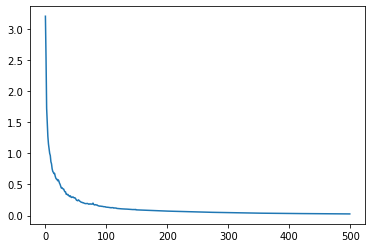

In [25]:
plt.plot(l)

In [26]:
def getAccuracy(X,Y,model):
    outputs  = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc

In [27]:
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9746
Test Acc 0.6067


In [28]:
#Since train Acuuracy is good but test accuracy is bad hence data is overfitting